#### Modules

In [9]:
# Basics
import sys
import os
import numpy as np
import pandas as pd

# Visuals
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.pyplot import cm


# Specific to biomolecular simulations
import MDAnalysis as mda

# My functions
import functions as myfuncs

# Charge dfs

In [10]:
# Load the data
my_path = "../Examples/"
my_name = "A_HairpinRibozyme_REST2_traj"

df = pd.read_csv(my_path + my_name + ".csv")

In [ ]:
data_names = [
    "d_A-1:O2prime-G8:N1",
    "d_A-1:O2prime-A10:N6",
    "d_A-1:O2prime-A38:N6",
    "d_A-1:O2prime-G+1:O1P",
    "d_A-1:O2prime-G+1:O2P",
    "d_G+1:O1P-G8:N2",
    "d_G+1:O2P-G8:N2",
    "A-1_puckering_pseudorot",
    "IAA",
]

long_names = [
    "A-1:O2' - G8:N1",
    "A-1:O2' - A10:N6",
    "A-1:O2' - A38:N6",
    "A-1:O2'- G+1:pro-Sp",
    "A-1:O2' - G+1:pro-Rp",
    "G+1:pro-Sp - G8:N2",
    "G+1:pro-Rp - G8:N2",
    "A-1 pseudo-rotation (°)",
    "IAA (°)",
]

# Stats on States

## States

In [ ]:
from collections import Counter

# find_the_jump(Selection)
# Jump_time=[493730]
# Jump_time = [0]*len(Selection)
# Selection = [10,11]

divide_in = 20


states_df = pd.DataFrame(columns=["L1", "LC", "L2", "Others"])


time = df["Time"]

print("Time of last frame = ", time[len(time) - 1])
print("nb of frames=", len(time))
step = int(time[1] - time[0])
print("size of step = ", step)
# time[0],time[1], str(float(time[len(time)-1])/len(time)))


div = int(len(time) / divide_in)
print(div)

Start_Frames = [i * div for i in range(0, int(len(time) / div))]
End_Frames = [(i + 1) * div for i in range(0, int(len(time) / div))]
print(Start_Frames)

# Ranges = [str(int(Start_Frames[s] * step/1000))+" - "+str(int(End_Frames[s] * step/1000)) + " ns" for s in range(len(Start_Frames))]
Ranges = [str(int(Start_Frames[s] * step / 1000)) for s in range(len(Start_Frames))]

print(Ranges)
Range_centers = [
    str(int(End_Frames[s] * step / 1000 - Start_Frames[s] * step / 1000 / 2))
    for s in range(len(Start_Frames))
]

for s in range(len(Start_Frames)):
    start_frame = Start_Frames[s]
    end_frame = End_Frames[s]

    da = {}
    data = pd.DataFrame(da)
    for d in range(len(Data_names)):
        print(data_names[d])
        if data_names[d] not in df.columns:
            print("Data not in columns")
        Values = df[data_names[d]]
        data[data_names[d]] = Values[start_frame:end_frame]
        print(len(Values))

    nbOfFrames, nbdatas = data.shape

    States = []
    pu = data["A-1_puckering_pseudorot"]
    dG8 = data["d_A-1:O2prime-G8:N1"]
    dA38 = data["d_A-1:O2prime-A38:N6"]
    dA10 = data["d_A-1:O2prime-A10:N6"]
    dO1P = data["d_A-1:O2prime-G+1:O1P"]
    dO2P = data["d_A-1:O2prime-G+1:O2P"]
    for s in range(nbOfFrames):
        if (
            (0 < pu[s] < 43 or 339 < pu[s]) and dA38[s] < 3.5 and dO2P[s] < dO1P[s]
        ):  # and dO2P[s] < 3.5:
            States.append("L2")
        elif (
            (0 < pu[s] < 43 or 339 < pu[s]) and dA10[s] < 3.5 and dO2P[s] < dO1P[s]
        ):  # and dO2P[s] < 3.5:
            States.append("L2")
        elif 138 < pu[s] < 205 and dG8[s] < 3.5 and dO1P[s] < dO2P[s]:
            States.append("L1")
        elif 138 < pu[s] < 205 and dG8[s] < 3.5 and dO2P[s] < dO1P[s]:
            States.append("LC")
        else:
            States.append("Others")

    data["States"] = States

    percentage_series = myfuncs.calculate_state_percentage(
        data["States"], ["L1", "LC", "L2", "Others"]
    )

    per_data = {
        "L2": [percentage_series["L2"]],
        "Others": [percentage_series["Others"]],
        "L1": [percentage_series["L1"]],
        "LC": [percentage_series["LC"]],
    }
    states_df = pd.concat([states_df, pd.DataFrame(per_data)], ignore_index=True)

# states_df.index = Range_centers
states_df.index = Ranges
# print(states_df)

# Create a stacked bar plot for each row
# fig, ax = plt.subplots(figsize=(10, 6))
fig, ax = plt.subplots(figsize=(12, 3))
statesT_df = states_df.T

# Plot each row as a stacked bar
bottom = np.zeros(len(statesT_df.columns))
Colors = ["orchid", "darkorange", "teal", "grey"]

c = 0
for idx, row in statesT_df.iterrows():
    ax.bar(statesT_df.columns, row, label=idx, bottom=bottom, color=Colors[c])
    bottom += row
    c += 1

plt.xlabel("Time (ns)", fontsize=20)
# lt.ylabel('(%)',fontsize=20)
plt.xticks(rotation=45, fontsize=15)
plt.yticks(fontsize=15)

# plt.xlabel('Time Ranges (ns)',fontsize=15)
# plt.ylabel('(%)',fontsize=20)
# plt.xticks(rotation=90, fontsize=10)
# plt.legend(title='Index', loc='upper right', bbox_to_anchor=(1.25, 1))
# plt.title(Names[i] + '('+str(i)+')', fontsize = 25)

plt.tight_layout()
# plt.savefig(Nextcloudpath + str(i) + "_States_evolution.png", bbox_inches="tight")

# plt.savefig(
#     Nextcloudpath + str(i) + "_states_evolution_in_bar.png",
#     dpi=300,
#     bbox_inches="tight",
# )
plt.show()

# states_df.plot(kind='line', marker='o', figsize=(10, 6))
# plt.xlabel('Time Ranges (ns)',fontsize=15)
# plt.ylabel('%')
# plt.grid(True)
# plt.title(Names[i] + '('+str(i)+')', fontsize = 25)

# # Show the plot
# plt.legend(loc='upper left')
# plt.tight_layout()
# #plt.savefig(Nextcloudpath + str(i) + "_States_evolution.png", bbox_inches='tight')
# plt.show()

Time of last frame =  672600.0
nb of frames= 13453
size of step =  50
672
[0, 672, 1344, 2016, 2688, 3360, 4032, 4704, 5376, 6048, 6720, 7392, 8064, 8736, 9408, 10080, 10752, 11424, 12096, 12768]
['0', '33', '67', '100', '134', '168', '201', '235', '268', '302', '336', '369', '403', '436', '470', '504', '537', '571', '604', '638']
d_A-1:O2prime-G8:N1
13453
d_A-1:O2prime-A10:N6
13453
d_A-1:O2prime-A38:N6
13453
d_A-1:O2prime-G+1:O1P
13453
d_A-1:O2prime-G+1:O2P
13453
d_G+1:O1P-G8:N2
13453
d_G+1:O2P-G8:N2
13453
A-1_puckering_pseudorot
13453
d_A-1:O2prime-G8:N1
13453
d_A-1:O2prime-A10:N6
13453
d_A-1:O2prime-A38:N6
13453
d_A-1:O2prime-G+1:O1P
13453
d_A-1:O2prime-G+1:O2P
13453
d_G+1:O1P-G8:N2
13453
d_G+1:O2P-G8:N2
13453
A-1_puckering_pseudorot
13453


/tmp/ipykernel_2174776/4108306998.py:89: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  states_df = pd.concat([states_df, pd.DataFrame(per_data)], ignore_index=True)


KeyError: 0

In [7]:
### Final Figures

from collections import Counter

# find_the_jump(Selection)
# Jump_time=[493730]
# Jump_time = [0]*len(Selection)
Selection = [136]

divide_in = 20

Data_names = [
    "IAA",
    "d_A-1:O2prime-G+1:P",
    "A-1_puckering_pseudorot",
    "d_A-1:O2prime-G8:N1",
    "d_A-1:O2prime-G+1:O1P",
    "d_A-1:O2prime-G+1:O2P",
    "d_A-1:O2prime-A38:N6",
    "d_A-1:O2prime-A10:N6",
]


for i in Selection:
    states_df = pd.DataFrame(columns=["L1", "LC", "L2", "Others"])
    df = all_dfs[i]
    print(str(i), Names[i])
    print(Paths[i])
    df = pd.read_csv(Paths[i] + Names[i] + "_all_data.csv")
    print(df.columns)
    print(df["Time"])
    exec("time=" + df["Time"][0])

    print("Time of last frame = ", time[len(time) - 1])
    print("nb of frames=", len(time))
    step = int(time[1] - time[0])
    print("size of step = ", step)
    # time[0],time[1], str(float(time[len(time)-1])/len(time)))

    div = int(len(time) / divide_in)
    print(div)

    Start_Frames = [i * div for i in range(0, int(len(time) / div))]
    End_Frames = [(i + 1) * div for i in range(0, int(len(time) / div))]
    print(Start_Frames)

    # Ranges = [str(int(Start_Frames[s] * step/1000))+" - "+str(int(End_Frames[s] * step/1000)) + " ns" for s in range(len(Start_Frames))]
    # print(Ranges)
    # Range_centers = [str(int( End_Frames[s] * step/1000 - Start_Frames[s] * step/1000  /2))  for s in range(len(Start_Frames))]

    Ranges = [str(int(Start_Frames[s] * step / 1000)) for s in range(len(Start_Frames))]
    print(Ranges)
    # +" - "+str(int(End_Frames[s] * step/1000)) + " ns" for s in range(len(Start_Frames))]
    print(Ranges)
    Range_centers = [
        str(int(End_Frames[s] * step / 1000 - Start_Frames[s] * step / 1000 / 2))
        for s in range(len(Start_Frames))
    ]

    for s in range(len(Start_Frames)):
        start_frame = Start_Frames[s]
        end_frame = End_Frames[s]

        da = {}
        data = pd.DataFrame(da)
        for d in range(len(Data_names)):
            print(df[Data_names[d]][0])
            exec("Values = " + df[Data_names[d]][0])
            data[Data_names[d]] = Values[start_frame:end_frame]
            print(len(Values))

        nbOfFrames, nbdatas = data.shape

        States = []
        pu = data["A-1_puckering_pseudorot"]
        dG8 = data["d_A-1:O2prime-G8:N1"]
        dA38 = data["d_A-1:O2prime-A38:N6"]
        dA10 = data["d_A-1:O2prime-A10:N6"]
        dO1P = data["d_A-1:O2prime-G+1:O1P"]
        dO2P = data["d_A-1:O2prime-G+1:O2P"]
        for s in range(nbOfFrames):
            if (
                (0 < pu[s] < 43 or 339 < pu[s]) and dA38[s] < 3.5 and dO2P[s] < dO1P[s]
            ):  # and dO2P[s] < 3.5:
                States.append("L2")
            elif (
                (0 < pu[s] < 43 or 339 < pu[s]) and dA10[s] < 3.5 and dO2P[s] < dO1P[s]
            ):  # and dO2P[s] < 3.5:
                States.append("L2")
            elif 138 < pu[s] < 205 and dG8[s] < 3.5 and dO1P[s] < dO2P[s]:
                States.append("L1")
            elif 138 < pu[s] < 205 and dG8[s] < 3.5 and dO2P[s] < dO1P[s]:
                States.append("LC")
            else:
                States.append("Others")

        data["States"] = States
        df["States"] = [States]
        df.to_csv(Paths[i] + Names[i] + "_all_data.csv", index=False)
        percentage_series = calculate_percentage(data["States"])
        per_data = {
            "L2": [percentage_series["L2"]],
            "Others": [percentage_series["Others"]],
            "L1": [percentage_series["L1"]],
            "LC": [percentage_series["LC"]],
        }
        states_df = pd.concat([states_df, pd.DataFrame(per_data)], ignore_index=True)

    # states_df.index = Range_centers
    states_df.index = Ranges
    df["States"] = [States]
    # print(states_df)

    # Create a stacked bar plot for each row
    # fig, ax = plt.subplots(figsize=(10, 6))
    fig, ax = plt.subplots(figsize=(8.7, 3))
    statesT_df = states_df.T

    # Plot each row as a stacked bar
    bottom = np.zeros(len(statesT_df.columns))
    Colors = ["orchid", "darkorange", "teal", "grey"]

    c = 0
    for idx, row in statesT_df.iterrows():
        ax.bar(statesT_df.columns, row, label=idx, bottom=bottom, color=Colors[c])
        bottom += row
        c += 1

    plt.xlabel("Time (ns)", fontsize=20)
    plt.ylabel("(%)", fontsize=15)
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=15)
    plt.legend(title="Index", loc="upper right", bbox_to_anchor=(1.25, 1))
    # plt.title(Names[i] + '('+str(i)+')', fontsize = 25)

    plt.tight_layout()
    plt.savefig(Nextcloudpath + str(i) + "_States_evolution.png", bbox_inches="tight")

    plt.savefig(
        Nextcloudpath + str(i) + "_states_evolution_in_bar.png",
        dpi=300,
        bbox_inches="tight",
    )
    plt.show()

    states_df.plot(kind="line", marker="o", figsize=(10, 6))
    plt.xlabel("Time Ranges (ns)", fontsize=15)
    plt.ylabel("%")
    plt.grid(True)
    plt.title(Names[i] + "(" + str(i) + ")", fontsize=25)

    # Show the plot
    plt.legend(loc="upper left")
    plt.tight_layout()

    plt.show()

NameError: name 'all_dfs' is not defined

## Pucker

146
Time of last frame =  320600.0
nb of frames= 3207
size of step =  100
89
[0, 89, 178, 267, 356, 445, 534, 623, 712, 801, 890, 979, 1068, 1157, 1246, 1335, 1424, 1513, 1602, 1691, 1780, 1869, 1958, 2047, 2136, 2225, 2314, 2403, 2492, 2581, 2670, 2759, 2848, 2937, 3026, 3115]
['0 - 8 ns', '8 - 17 ns', '17 - 26 ns', '26 - 35 ns', '35 - 44 ns', '44 - 53 ns', '53 - 62 ns', '62 - 71 ns', '71 - 80 ns', '80 - 89 ns', '89 - 97 ns', '97 - 106 ns', '106 - 115 ns', '115 - 124 ns', '124 - 133 ns', '133 - 142 ns', '142 - 151 ns', '151 - 160 ns', '160 - 169 ns', '169 - 178 ns', '178 - 186 ns', '186 - 195 ns', '195 - 204 ns', '204 - 213 ns', '213 - 222 ns', '222 - 231 ns', '231 - 240 ns', '240 - 249 ns', '249 - 258 ns', '258 - 267 ns', '267 - 275 ns', '275 - 284 ns', '284 - 293 ns', '293 - 302 ns', '302 - 311 ns', '311 - 320 ns']
<bound method NDFrame.head of            0 - 8 ns  8 - 17 ns  17 - 26 ns  26 - 35 ns  35 - 44 ns  \
C3'-endo   0.000000   6.741573   17.977528   21.348315   46.067416   


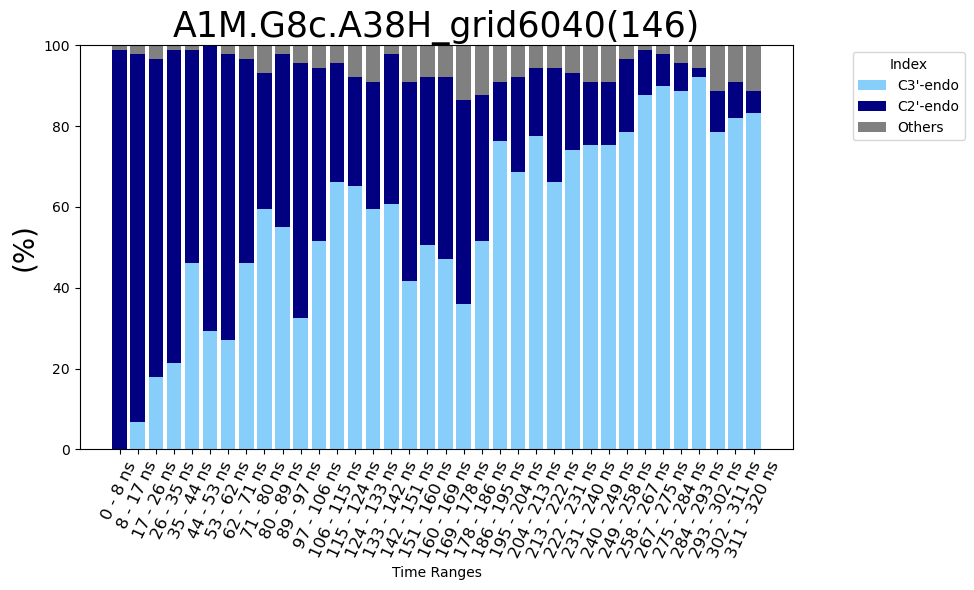

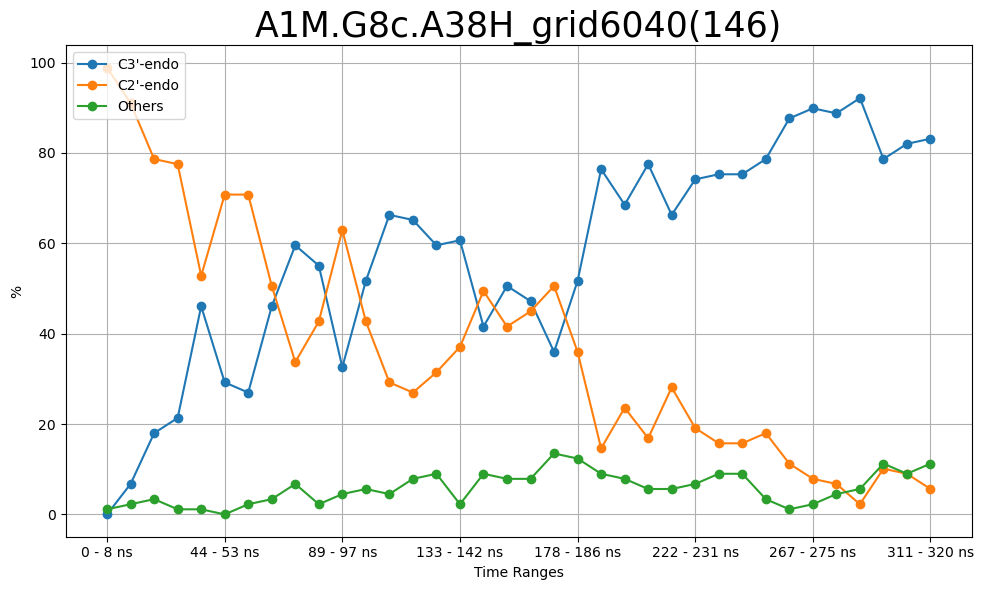

In [ ]:
from collections import Counter

Selection = [146]  # ,142,9]

divide_in = 36


All_States = [[]]
c = 0

Data_names = ["A-1_puckering_pseudorot"]


for i in Selection:
    states_df = pd.DataFrame(columns=["C3'-endo", "C2'-endo", "Others"])
    df = all_dfs[i]
    print(str(i))
    df = pd.read_csv(Paths[i] + Names[i] + "_all_data.csv")

    exec("time=" + df["Time"][0])
    print("Time of last frame = ", time[len(time) - 1])
    print("nb of frames=", len(time))
    step = int(time[1] - time[0])
    print(
        "size of step = ", step
    )  # time[0],time[1], str(float(time[len(time)-1])/len(time)))

    div = int(len(time) / divide_in)
    print(div)

    Start_Frames = [i * div for i in range(0, int(len(time) / div))]
    End_Frames = [(i + 1) * div for i in range(0, int(len(time) / div))]
    print(Start_Frames)

    Ranges = [
        str(int(Start_Frames[s] * step / 1000))
        + " - "
        + str(int(End_Frames[s] * step / 1000))
        + " ns"
        for s in range(len(Start_Frames))
    ]
    print(Ranges)

    for s in range(len(Start_Frames)):
        start_frame = Start_Frames[s]
        end_frame = End_Frames[s]

        da = {}
        data = pd.DataFrame(da)
        for d in range(len(Data_names)):
            exec("Values = " + df[Data_names[d]][0])
            data[Data_names[d]] = Values[start_frame:end_frame]

        nbOfFrames, nbdatas = data.shape

        States = []
        pu = data["A-1_puckering_pseudorot"]
        for s in range(nbOfFrames):
            if 0 < pu[s] < 43 or 339 < pu[s]:  # and dO2P[s] < 3.5:
                States.append("C3'-endo")

            elif 138 < pu[s] < 205:
                States.append("C2'-endo")
            else:
                States.append("Others")

        data["States"] = States
        percentage_series = calculate_percentage_pucker(data["States"])
        per_data = {
            "C3'-endo": [percentage_series["C3'-endo"]],
            "C2'-endo": [percentage_series["C2'-endo"]],
            "Others": [percentage_series["Others"]],
        }
        states_df = pd.concat([states_df, pd.DataFrame(per_data)], ignore_index=True)

    states_df.index = Ranges
    # print(states_df)

    # Create a stacked bar plot for each row
    fig, ax = plt.subplots(figsize=(10, 6))
    statesT_df = states_df.T
    print(statesT_df.head)
    # Plot each row as a stacked bar
    bottom = np.zeros(len(statesT_df.columns))
    Colors = ["lightskyblue", "navy", "grey"]

    c = 0
    for idx, row in statesT_df.iterrows():
        print(c)
        ax.bar(statesT_df.columns, row, label=idx, bottom=bottom, color=Colors[c])
        bottom += row
        c += 1

    plt.xlabel("Time Ranges")
    plt.ylabel("(%)", fontsize=20)
    plt.xticks(rotation=65, fontsize=12)
    plt.legend(title="Index", loc="upper right", bbox_to_anchor=(1.25, 1))
    plt.title(Names[i] + "(" + str(i) + ")", fontsize=25)

    plt.tight_layout()
    plt.savefig(Nextcloudpath + str(i) + "_Pucker_evolution.png", bbox_inches="tight")
    plt.show()

    states_df.plot(kind="line", marker="o", figsize=(10, 6))
    plt.xlabel("Time Ranges")
    plt.ylabel("%")
    plt.grid(True)
    plt.title(Names[i] + "(" + str(i) + ")", fontsize=25)

    # Show the plot
    plt.legend(loc="upper left")
    plt.tight_layout()
    plt.show()

## Tau 2

69
Time of last frame =  500000.0
nb of frames= 5001
size of step =  100
138
[0, 138, 276, 414, 552, 690, 828, 966, 1104, 1242, 1380, 1518, 1656, 1794, 1932, 2070, 2208, 2346, 2484, 2622, 2760, 2898, 3036, 3174, 3312, 3450, 3588, 3726, 3864, 4002, 4140, 4278, 4416, 4554, 4692, 4830]
['0', '13', '27', '41', '55', '69', '82', '96', '110', '124', '138', '151', '165', '179', '193', '207', '220', '234', '248', '262', '276', '289', '303', '317', '331', '345', '358', '372', '386', '400', '414', '427', '441', '455', '469', '483']
States
tau2 neg C2'-endo    75.362319
tau2 pos C3'-endo    24.637681
C3'-endo              0.000000
C2'-endo              0.000000
Others                0.000000
Name: count, dtype: float64
States
tau2 neg C2'-endo    69.565217
tau2 pos C3'-endo    30.434783
C3'-endo              0.000000
C2'-endo              0.000000
Others                0.000000
Name: count, dtype: float64
States
tau2 pos C3'-endo    58.695652
tau2 neg C2'-endo    41.304348
C3'-endo              0

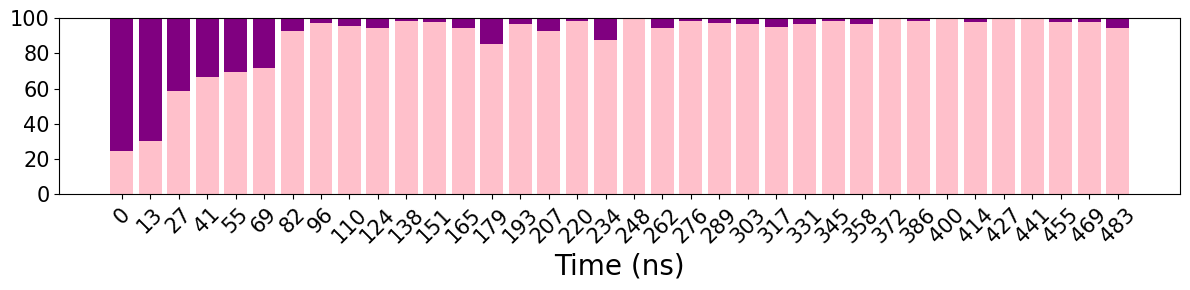

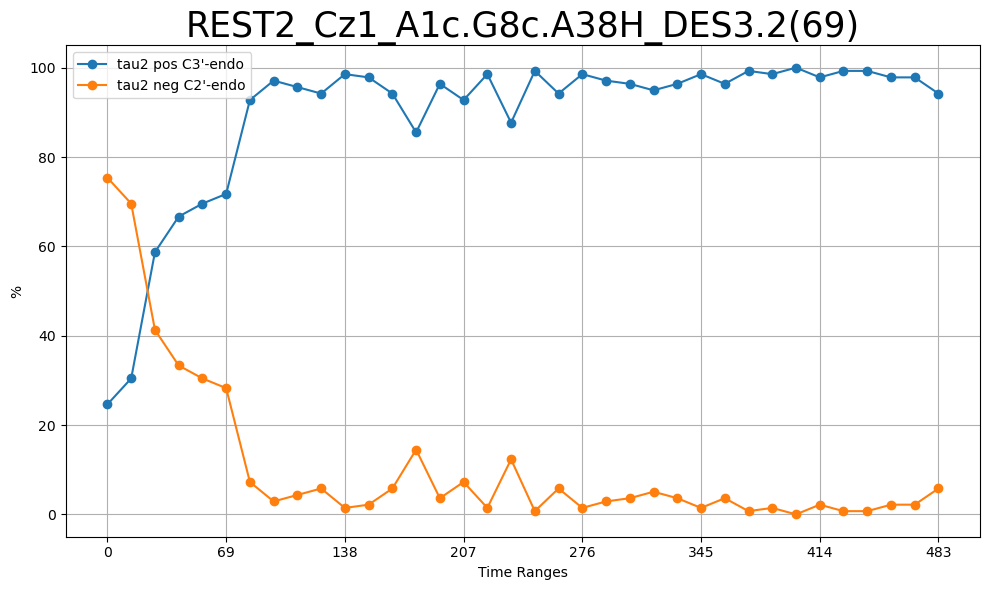

In [ ]:
from collections import Counter

Selection = [69]

divide_in = 36


All_States = [[]]
c = 0

Data_names = ["5_tau2"]


for i in Selection:
    states_df = pd.DataFrame(columns=["tau2 pos C3'-endo", "tau2 neg C2'-endo"])
    df = all_dfs[i]
    print(str(i))
    df = pd.read_csv(Paths[i] + Names[i] + "_all_data.csv")
    exec("time=" + df["Time"][0])
    print("Time of last frame = ", time[len(time) - 1])
    print("nb of frames=", len(time))
    step = int(time[1] - time[0])
    print(
        "size of step = ", step
    )  # time[0],time[1], str(float(time[len(time)-1])/len(time)))

    div = int(len(time) / divide_in)
    print(div)

    Start_Frames = [i * div for i in range(0, int(len(time) / div))]
    End_Frames = [(i + 1) * div for i in range(0, int(len(time) / div))]
    print(Start_Frames)

    Ranges = [
        str(int(Start_Frames[s] * step / 1000))
        + " - "
        + str(int(End_Frames[s] * step / 1000))
        + " ns"
        for s in range(len(Start_Frames))
    ]
    Ranges = [str(int(Start_Frames[s] * step / 1000)) for s in range(len(Start_Frames))]
    print(Ranges)

    for s in range(len(Start_Frames)):
        start_frame = Start_Frames[s]
        end_frame = End_Frames[s]

        da = {}
        data = pd.DataFrame(da)
        for d in range(len(Data_names)):
            exec("Values = " + df[Data_names[d]][0])
            data[Data_names[d]] = Values[start_frame:end_frame]

        nbOfFrames, nbdatas = data.shape

        States = []
        tau2 = data["5_tau2"]
        Flag_C3endo = False
        Flag_C2endo = False
        for s in range(nbOfFrames):
            if tau2[s] < 0:  # and dO2P[s] < 3.5:
                States.append("tau2 neg C2'-endo")
                Flag_C2endo = True

            else:
                States.append("tau2 pos C3'-endo")
                Flag_C3endo = True

        data["States"] = States
        percentage_series = calculate_percentage_pucker(data["States"])
        print(percentage_series)
        if Flag_C2endo == False:
            percentage_series["tau2 neg C2'-endo"] = 0
        if Flag_C3endo == False:
            percentage_series["tau2 pos C3'-endo"] = 0
        per_data = {
            "tau2 pos C3'-endo": [percentage_series["tau2 pos C3'-endo"]],
            "tau2 neg C2'-endo": [percentage_series["tau2 neg C2'-endo"]],
        }

        states_df = pd.concat([states_df, pd.DataFrame(per_data)], ignore_index=True)

    states_df.index = Ranges
    # print(states_df)

    # Create a stacked bar plot for each row
    # fig, ax = plt.subplots(figsize=(10, 6))
    fig, ax = plt.subplots(figsize=(12, 3))
    statesT_df = states_df.T
    print(statesT_df.head)
    # Plot each row as a stacked bar
    bottom = np.zeros(len(statesT_df.columns))
    Colors = ["pink", "purple", "grey"]

    c = 0
    for idx, row in statesT_df.iterrows():
        print(c)
        ax.bar(statesT_df.columns, row, label=idx, bottom=bottom, color=Colors[c])
        bottom += row
        c += 1

    plt.xlabel("Time (ns)", fontsize=20)
    # lt.ylabel('(%)',fontsize=20)
    plt.xticks(rotation=45, fontsize=15)
    plt.yticks(fontsize=15)

    plt.tight_layout()
    plt.savefig(Nextcloudpath + str(i) + "_Pucker_evolution.png", bbox_inches="tight")
    plt.show()

    states_df.plot(kind="line", marker="o", figsize=(10, 6))
    plt.xlabel("Time Ranges")
    plt.ylabel("%")
    plt.grid(True)
    plt.title(Names[i] + "(" + str(i) + ")", fontsize=25)

    # Show the plot
    plt.legend(loc="upper left")
    plt.tight_layout()
    plt.show()

In [ ]:
from collections import Counter

Selection = [153]  # ,142,9]

divide_in = 36


All_States = [[]]
c = 0

Data_names = ["A-1_puckering_pseudorot"]


for i in Selection:
    states_df = pd.DataFrame(columns=["C3'-endo", "C2'-endo", "Others"])
    df = all_dfs[i]
    print(str(i))
    df = pd.read_csv(Paths[i] + Names[i] + "_all_data.csv")

    exec("time=" + df["Time"][0])
    print("Time of last frame = ", time[len(time) - 1])
    print("nb of frames=", len(time))
    step = int(time[1] - time[0])
    print(
        "size of step = ", step
    )  # time[0],time[1], str(float(time[len(time)-1])/len(time)))

    div = int(len(time) / divide_in)
    print(div)

    Start_Frames = [i * div for i in range(0, int(len(time) / div))]
    End_Frames = [(i + 1) * div for i in range(0, int(len(time) / div))]
    print(Start_Frames)

    Ranges = [
        str(int(Start_Frames[s] * step / 1000))
        + " - "
        + str(int(End_Frames[s] * step / 1000))
        + " ns"
        for s in range(len(Start_Frames))
    ]
    print(Ranges)

    for s in range(len(Start_Frames)):
        start_frame = Start_Frames[s]
        end_frame = End_Frames[s]

        da = {}
        data = pd.DataFrame(da)
        for d in range(len(Data_names)):
            exec("Values = " + df[Data_names[d]][0])
            data[Data_names[d]] = Values[start_frame:end_frame]

        nbOfFrames, nbdatas = data.shape

        States = []
        pu = data["A-1_puckering_pseudorot"]
        for s in range(nbOfFrames):
            if 0 < pu[s] < 43 or 339 < pu[s]:  # and dO2P[s] < 3.5:
                States.append("C3'-endo")

            elif 138 < pu[s] < 205:
                States.append("C2'-endo")
            else:
                States.append("Others")

        data["States"] = States
        percentage_series = calculate_percentage_pucker(data["States"])
        per_data = {
            "C3'-endo": [percentage_series["C3'-endo"]],
            "C2'-endo": [percentage_series["C2'-endo"]],
            "Others": [percentage_series["Others"]],
        }
        states_df = pd.concat([states_df, pd.DataFrame(per_data)], ignore_index=True)

    states_df.index = Ranges
    # print(states_df)

    # Create a stacked bar plot for each row
    fig, ax = plt.subplots(figsize=(10, 6))
    statesT_df = states_df.T
    print(statesT_df.head)
    # Plot each row as a stacked bar
    bottom = np.zeros(len(statesT_df.columns))
    Colors = ["lightskyblue", "navy", "grey"]

    c = 0
    for idx, row in statesT_df.iterrows():
        print(c)
        ax.bar(statesT_df.columns, row, label=idx, bottom=bottom, color=Colors[c])
        bottom += row
        c += 1

    plt.xlabel("Time Ranges")
    plt.ylabel("(%)", fontsize=20)
    plt.xticks(rotation=65, fontsize=12)
    plt.legend(title="Index", loc="upper right", bbox_to_anchor=(1.25, 1))
    plt.title(Names[i] + "(" + str(i) + ")", fontsize=25)

    plt.tight_layout()
    plt.savefig(Nextcloudpath + str(i) + "_Pucker_evolution.png", bbox_inches="tight")
    plt.show()

    states_df.plot(kind="line", marker="o", figsize=(10, 6))
    plt.xlabel("Time Ranges")
    plt.ylabel("%")
    plt.grid(True)
    plt.title(Names[i] + "(" + str(i) + ")", fontsize=25)

    # Show the plot
    plt.legend(loc="upper left")
    plt.tight_layout()
    plt.show()

# Evaluate the stat with block time analysis

100 A1P.G8c.A38H-proSp_ezc
/data/forget/Documents/Research/runs/REST2/cOL3_ezOL1_Residcorr/A1P.G8c.A38H-proSp_ezc_TIP3P_0.2MKCl/out_500ns/0/
Index(['Unnamed: 0.15', 'Unnamed: 0.14', 'Unnamed: 0.13', 'Unnamed: 0.12',
       'Unnamed: 0.11', 'Unnamed: 0.10', 'Unnamed: 0.9', 'Unnamed: 0.8',
       'Unnamed: 0.7', 'Unnamed: 0.6',
       ...
       'Matrix Position', 'States', 'd_G+1:O1P-G+1:N2', 'd_G+1:O2P-G+1;N2',
       'd_G+1:O2P-G+1:N2', 'chi_5', 'chi_6', 'chi_A-1', 'chi_G+1',
       'd_A-1:O2prime-G+1:HOP'],
      dtype='object', length=148)
0    [0.0, 100.0, 200.0, 300.0, 400.0, 500.0, 600.0...
Name: Time, dtype: object
Time of last frame =  500000.0
nb of frames= 5001
size of step =  100
Sart_of_converged_range_byframe =  2500


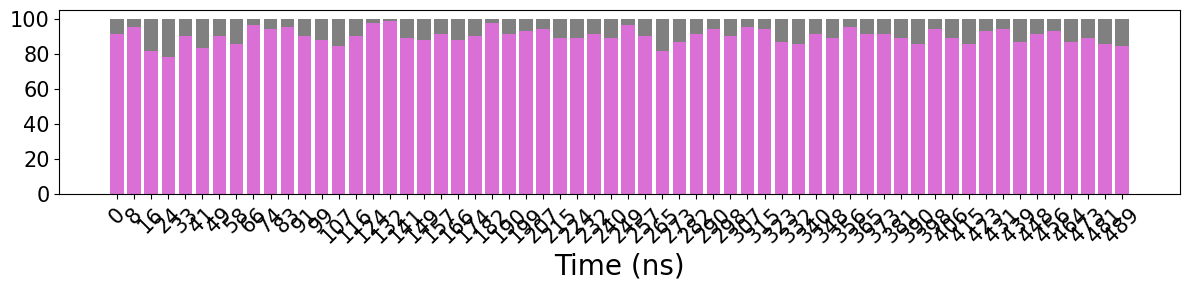

The average of L2 is  0.0 +/- 0.0
The average of L1 is  89.73826339842127 +/- 1.348918700775373
The average of LC is  0.0 +/- 0.0
The average of Others is  10.261736601578729 +/- 1.3489187007753722
The average of IAA and d ratio is  0.7303697548815954 +/- 0.04877491044908498


In [ ]:
from collections import Counter

# find_the_jump(Selection)
# Jump_time=[493730]
# Jump_time = [0]*len(Selection)
# Selection = [10,11]

divide_in = 60

Data_names = [
    "IAA",
    "d_A-1:O2prime-G+1:P",
    "A-1_puckering_pseudorot",
    "d_A-1:O2prime-G8:N1",
    "d_A-1:O2prime-G+1:O1P",
    "d_A-1:O2prime-G+1:O2P",
    "d_A-1:O2prime-A38:N6",
    "d_A-1:O2prime-A10:N6",
]

Sart_of_converged_range = 250000  # ps

Selection = [100]
for i in Selection:
    states_df = pd.DataFrame(columns=["L1", "LC", "L2", "Others"])
    df = all_dfs[i]
    print(str(i), Names[i])
    print(Paths[i])
    df = pd.read_csv(Paths[i] + Names[i] + "_all_data.csv")
    print(df.columns)
    print(df["Time"])
    exec("time=" + df["Time"][0])

    print("Time of last frame = ", time[len(time) - 1])
    print("nb of frames=", len(time))
    step = int(time[1] - time[0])
    print("size of step = ", step)

    Sart_of_converged_range_byframe = int(Sart_of_converged_range / step)
    print("Sart_of_converged_range_byframe = ", Sart_of_converged_range_byframe)
    # time[0],time[1], str(float(time[len(time)-1])/len(time)))

    div = int(len(time) / divide_in)
    # print(div)

    Start_Frames = [i * div for i in range(0, int(len(time) / div))]
    End_Frames = [(i + 1) * div for i in range(0, int(len(time) / div))]
    # print(Start_Frames)

    # Ranges = [str(int(Start_Frames[s] * step/1000))+" - "+str(int(End_Frames[s] * step/1000)) + " ns" for s in range(len(Start_Frames))]
    Ranges = [str(int(Start_Frames[s] * step / 1000)) for s in range(len(Start_Frames))]

    # print(Ranges)
    Range_centers = [
        str(int(End_Frames[s] * step / 1000 - Start_Frames[s] * step / 1000 / 2))
        for s in range(len(Start_Frames))
    ]

    For_stats_L1 = []
    For_stats_LC = []
    For_stats_L2 = []
    For_stats_Others = []

    For_IAA_and_d_ratio = []

    for s in range(len(Start_Frames)):
        start_frame = Start_Frames[s]
        end_frame = End_Frames[s]

        da = {}
        data = pd.DataFrame(da)
        for d in range(len(Data_names)):
            # print(Data_names[d])
            if Data_names[d] not in df.columns:
                print("Data not in columns")
            exec("Values = " + df[Data_names[d]][0])
            data[Data_names[d]] = Values[start_frame:end_frame]
            # print(len(Values))

        nbOfFrames, nbdatas = data.shape

        States = []
        pu = data["A-1_puckering_pseudorot"]
        dG8 = data["d_A-1:O2prime-G8:N1"]
        dA38 = data["d_A-1:O2prime-A38:N6"]
        dA10 = data["d_A-1:O2prime-A10:N6"]
        dO1P = data["d_A-1:O2prime-G+1:O1P"]
        dO2P = data["d_A-1:O2prime-G+1:O2P"]
        for s in range(nbOfFrames):
            if (
                (0 < pu[s] < 43 or 339 < pu[s]) and dA38[s] < 3.5 and dO2P[s] < dO1P[s]
            ):  # and dO2P[s] < 3.5:
                States.append("L2")
            elif (
                (0 < pu[s] < 43 or 339 < pu[s]) and dA10[s] < 3.5 and dO2P[s] < dO1P[s]
            ):  # and dO2P[s] < 3.5:
                States.append("L2")
            elif 138 < pu[s] < 205 and dG8[s] < 3.5 and dO1P[s] < dO2P[s]:
                States.append("L1")
            elif 138 < pu[s] < 205 and dG8[s] < 3.5 and dO2P[s] < dO1P[s]:
                States.append("LC")
            else:
                States.append("Others")
        IAA = data["IAA"]
        dist = data["d_A-1:O2prime-G+1:P"]

        c = 0
        for i in range(len(dist)):
            # print(d)
            d = dist[i]
            iaa = IAA[i]
            if d <= 3.5 and iaa >= 140:
                c += 1
        # print('both ratio =',c/len(dist))

        data["States"] = States
        # df['States'] = [States]
        # df.to_csv(Paths[i]+Names[i]+'_all_data.csv', index=False)
        percentage_series = calculate_percentage(data["States"])

        per_data = {
            "L2": [percentage_series["L2"]],
            "Others": [percentage_series["Others"]],
            "L1": [percentage_series["L1"]],
            "LC": [percentage_series["LC"]],
        }

        # print(per_data)

        # print("shape of data",data.shape)
        states_df = pd.concat([states_df, pd.DataFrame(per_data)], ignore_index=True)

        if start_frame > Sart_of_converged_range_byframe:
            For_stats_L1.append(percentage_series["L1"])
            For_stats_LC.append(percentage_series["LC"])
            For_stats_L2.append(percentage_series["L2"])
            For_stats_Others.append(percentage_series["Others"])
            For_IAA_and_d_ratio.append(c / len(dist))

    # states_df.index = Range_centers
    states_df.index = Ranges
    df["States"] = [States]
    # print(states_df)

    # Create a stacked bar plot for each row
    # fig, ax = plt.subplots(figsize=(10, 6))
    fig, ax = plt.subplots(figsize=(12, 3))
    statesT_df = states_df.T

    # Plot each row as a stacked bar
    bottom = np.zeros(len(statesT_df.columns))
    Colors = ["orchid", "darkorange", "teal", "grey"]

    c = 0
    for idx, row in statesT_df.iterrows():
        ax.bar(statesT_df.columns, row, label=idx, bottom=bottom, color=Colors[c])
        bottom += row
        c += 1

    plt.xlabel("Time (ns)", fontsize=20)
    # lt.ylabel('(%)',fontsize=20)
    plt.xticks(rotation=45, fontsize=15)
    plt.yticks(fontsize=15)

    plt.tight_layout()
    plt.savefig(Nextcloudpath + str(i) + "_States_evolution.png", bbox_inches="tight")

    plt.savefig(
        Nextcloudpath + str(i) + "_states_evolution_in_bar.png",
        dpi=300,
        bbox_inches="tight",
    )
    plt.show()

    # states_df.plot(kind='line', marker='o', figsize=(10, 6))
    # plt.xlabel('Time Ranges (ns)',fontsize=15)
    # plt.ylabel('%')
    # plt.grid(True)
    # plt.title(Names[i] + '('+str(i)+')', fontsize = 25)

    # # Show the plot
    # plt.legend(loc='upper left')
    # plt.tight_layout()
    # #plt.savefig(Nextcloudpath + str(i) + "_States_evolution.png", bbox_inches='tight')
    # plt.show()
coeff_95 = 1.96


# print("For_stats_L1",For_stats_L1)
# print("The average of L1 is ", np.mean(For_stats_L1), "with a standard deviation of ", np.std(For_stats_L1))
# print("Error margin is ", np.std(For_stats_L1)/np.sqrt(len(For_stats_L1)))

# print("For_stats_LC",For_stats_LC)
# print("The average of LC is ", np.mean(For_stats_LC), "with a standard deviation of ", np.std(For_stats_LC))


# print("For_stats_L2",For_stats_L2)
# print("The average of L2 is ", np.mean(For_stats_L2), "+/-",  np.std(For_stats_L2) * coeff_95 / np.sqrt(len(For_stats_L2)))

# print("For_stats_Others",For_stats_Others)
# print("The average of Others is ", np.mean(For_stats_Others), "+/-",  np.std(For_stats_Others) * coeff_95 / np.sqrt(len(For_stats_Others)))


from scipy.stats import t

n = len(For_stats_L2)
std = np.std(For_stats_L2)

confidence_level = 0.95
degrees_freedom = n - 1
t_value = t.ppf((1 + confidence_level) / 2, degrees_freedom)
error_bars = t_value * (std / np.sqrt(n))

print("The average of L2 is ", np.mean(For_stats_L2), "+/-", error_bars)


n = len(For_stats_L1)
std = np.std(For_stats_L1)

confidence_level = 0.95
degrees_freedom = n - 1
t_value = t.ppf((1 + confidence_level) / 2, degrees_freedom)
error_bars = t_value * (std / np.sqrt(n))

print("The average of L1 is ", np.mean(For_stats_L1), "+/-", error_bars)


n = len(For_stats_LC)
std = np.std(For_stats_LC)

confidence_level = 0.95
degrees_freedom = n - 1
t_value = t.ppf((1 + confidence_level) / 2, degrees_freedom)
error_bars = t_value * (std / np.sqrt(n))

print("The average of LC is ", np.mean(For_stats_LC), "+/-", error_bars)


n = len(For_stats_Others)
std = np.std(For_stats_Others)

confidence_level = 0.95
degrees_freedom = n - 1
t_value = t.ppf((1 + confidence_level) / 2, degrees_freedom)
error_bars = t_value * (std / np.sqrt(n))

print("The average of Others is ", np.mean(For_stats_Others), "+/-", error_bars)

n = len(For_IAA_and_d_ratio)
std = np.std(For_IAA_and_d_ratio)

confidence_level = 0.95
degrees_freedom = n - 1
t_value = t.ppf((1 + confidence_level) / 2, degrees_freedom)
error_bars = t_value * (std / np.sqrt(n))

print(
    "The average of IAA and d ratio is ",
    np.mean(For_IAA_and_d_ratio),
    "+/-",
    error_bars,
)